# **Import Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Membaca file CSV menggunakan Pandas
df_transaction = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Case Study - Transaction.csv', delimiter=';')
df_store = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Case Study - Store.csv', delimiter=';')
df_product = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Case Study - Product.csv', delimiter=';')
df_cust = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Case Study - Customer.csv', delimiter=';')

In [4]:
# Menampilkan data DataFrame
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [5]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [6]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [7]:
df_cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


# **Data Cleaning**

In [8]:
#checking the missing values
def missing_values(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
  mv = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
  print('Columns with missing values: ')
  print(mv[~(mv['Total']==0)])
  return

### Transaction

In [9]:
missing_values(df_transaction)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [10]:
#checking duplicated on transaction
df_transaction.duplicated().sum()

0

In [11]:
#checking the table info
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [12]:
#changing data type for Date
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')

In [13]:
#transaction table describe
df_transaction.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5020.0,221.263745,129.672955,1.0,108.0,221.0,332.0,447.0
Price,5020.0,9684.800797,4600.708780,3200.0,4200.0,9400.0,15000.0,18000.0
Qty,5020.0,3.644622,1.855295,1.0,2.0,3.0,5.0,10.0
TotalAmount,5020.0,32279.482072,19675.462455,7500.0,16000.0,28200.0,47000.0,88000.0
StoreID,5020.0,7.489841,4.028502,1.0,4.0,7.0,11.0,14.0


### Store

In [14]:
missing_values(df_store)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [15]:
#checking duplicated on store
df_store.duplicated().sum()

0

In [16]:
#checking the table info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [17]:
#changing data type for Latitude and Longitude
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.').astype(float)

In [18]:
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.').astype(float)

In [19]:
#transaction table describe
df_store.describe().T

,count,mean,std,min,25%,50%,75%,max
StoreID,14.0,7.500000,4.183300,1.000000,4.250000,7.500000,10.750000,14.000000
Latitude,14.0,-2.902409,4.516744,-7.797068,-6.736148,-4.395051,0.082839,5.548290
Longitude,14.0,109.463117,8.654790,95.323753,104.884083,108.989384,114.134794,128.190643


### Product

In [20]:
missing_values(df_product)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [21]:
#checking duplicated on product
df_product.duplicated().sum()

0

In [22]:
#checking the table info
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [23]:
#product table describe
df_product.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10.0,10410.0,4890.455557,3200.0,7825.0,9700.0,14250.0,18000.0


### Customer

In [24]:
missing_values(df_cust)

Columns with missing values: 
                Total   Percent
Marital Status      3  0.671141


In [25]:
modus = df_cust['Marital Status'].mode().iloc[0]

In [26]:
df_cust['Marital Status'].fillna(modus, inplace=True)

In [27]:
#checking duplicated on customer
df_cust.duplicated().sum()

0

In [28]:
#customer table describe
df_cust.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,447.0,224.000000,129.182042,1.0,112.5,224.0,335.5,447.0
Age,447.0,39.782998,12.848719,0.0,30.0,39.0,50.5,72.0
Gender,447.0,0.458613,0.498842,0.0,0.0,0.0,1.0,1.0


# **Merge Dataset**

In [29]:
# joining between df_transaksi and df_product by column 'product_id'
df_merged = df_transaction.merge(df_product, on='ProductID', how='left')

In [30]:
# joining between df_merged and df_customer by column 'CustomerID'
df_merged = df_merged.merge(df_cust, on='CustomerID', how='left')

In [31]:
# joining between df_merged and df_store by column 'store_id'
df_merged = df_merged.merge(df_store, on='StoreID', how='left')

In [32]:
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,7500,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,Yoghurt,10000,44,1,Married,"14,58",Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,Choco Bar,8800,27,1,Single,"0,18",Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,Choco Bar,8800,48,1,Married,"12,57",Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,Yoghurt,10000,33,0,Married,"6,95",Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [33]:
# Rename column Price
df_merged.rename(columns={'Price_x': 'Price'}, inplace=True)

In [34]:
# Drop column Price_y
df_merged.drop(columns='Price_y', inplace=True)

In [35]:
#re-checking the missing values
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,Yoghurt,44,1,Married,"14,58",Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,Choco Bar,27,1,Single,"0,18",Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,Choco Bar,48,1,Married,"12,57",Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,Yoghurt,33,0,Married,"6,95",Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [36]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Product Name    5020 non-null   object        
 9   Age             5020 non-null   int64         
 10  Gender          5020 non-null   int64         
 11  Marital Status  5020 non-null   object        
 12  Income          5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [37]:
# change format data column 'Income' to float64
df_merged['Income'] = df_merged['Income'].str.replace(',', '.').astype(float)

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Product Name    5020 non-null   object        
 9   Age             5020 non-null   int64         
 10  Gender          5020 non-null   int64         
 11  Marital Status  5020 non-null   object        
 12  Income          5020 non-null   float64       
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

#**Outlier**

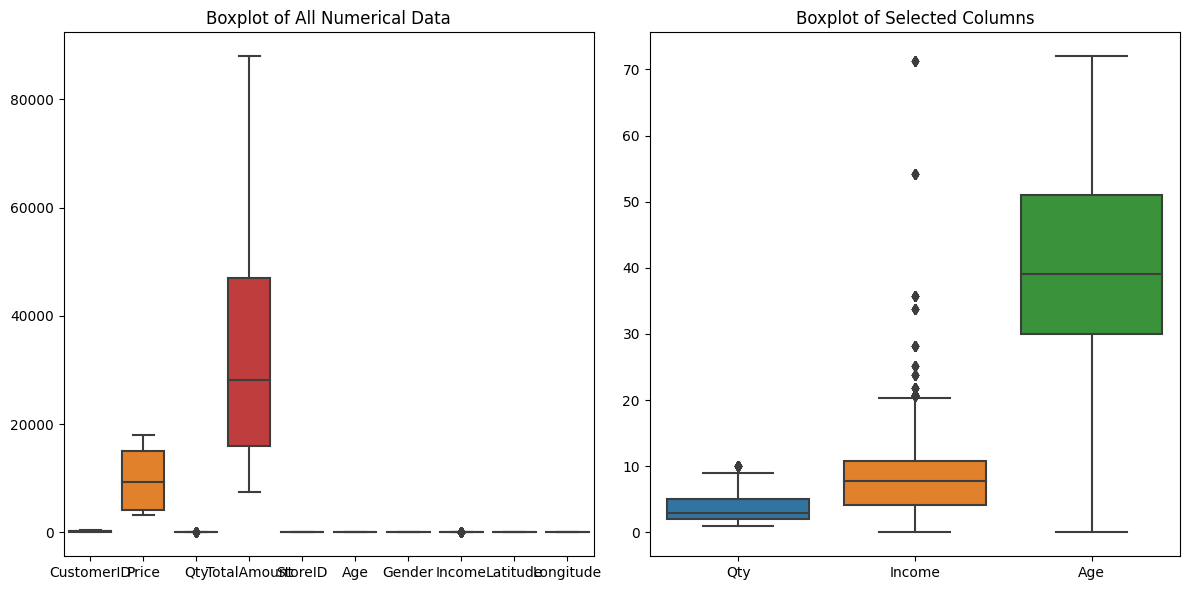

In [39]:
boxplot_data = ['Qty','Income', 'Age']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])

sns.boxplot(data=df_merged, ax=ax1)
ax1.set_title("Boxplot of All Numerical Data")

sns.boxplot(data=df_merged[boxplot_data], ax=ax2)
ax2.set_title("Boxplot of Selected Columns")

# make sure the plot not overlap
plt.tight_layout()

# **`Machine Learning Regresi`**

In [42]:
df_regression = df_merged.groupby('Date')['Qty'].sum().reset_index()

In [43]:
print(df_regression)

          Date  Qty
0   2022-01-01   49
1   2022-01-02   59
2   2022-01-03   63
3   2022-01-04   45
4   2022-01-05   30
..         ...  ...
360 2022-12-27   70
361 2022-12-28   68
362 2022-12-29   42
363 2022-12-30   44
364 2022-12-31   37

[365 rows x 2 columns]


In [52]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [53]:
# Split data to data training and data testing
train_data = df_regression.iloc[:300]
test_data = df_regression.iloc[300:]

In [66]:
# prepare time series dataset
# make sure column 'Date' in datetime format
df_regression['Date'] = pd.to_datetime(df_regression['Date'])
df_regression.set_index('Date', inplace=True)

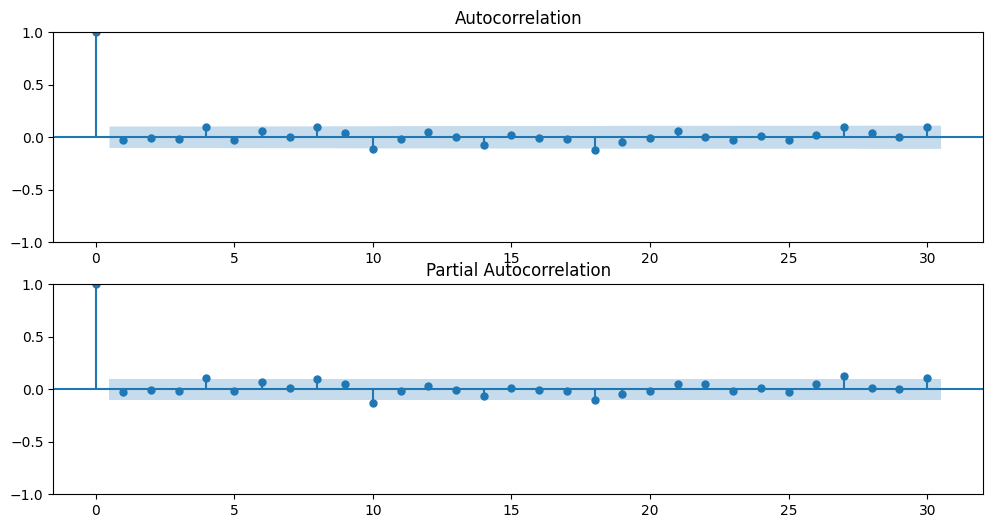

In [67]:
# show plot ACF and PACF for time series data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df_regression['Qty'], lags=30, ax=plt.gca(), alpha=0.05)
plt.subplot(2, 1, 2)
plot_pacf(df_regression['Qty'], lags=30, ax=plt.gca(), alpha=0.05)
plt.show()

In [68]:
# Determine p, d, and q values based on visual analysis of ACF and PACF
p = 1
d = 0
q = 1

In [150]:
# Create ARIMA model with time series data
model = ARIMA(df_regression['Qty'], order=(p, d, q))
results = model.fit()

In [151]:
# Prediction for 30 next period
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

In [156]:
# Convert the forecast results to a Series with datetime index
forecast_index = pd.date_range(start=test_data.index[-1], periods=forecast_steps + 1, closed='right')
forecast_series = pd.Series(forecast, index=forecast_index)

KeyError: ignored

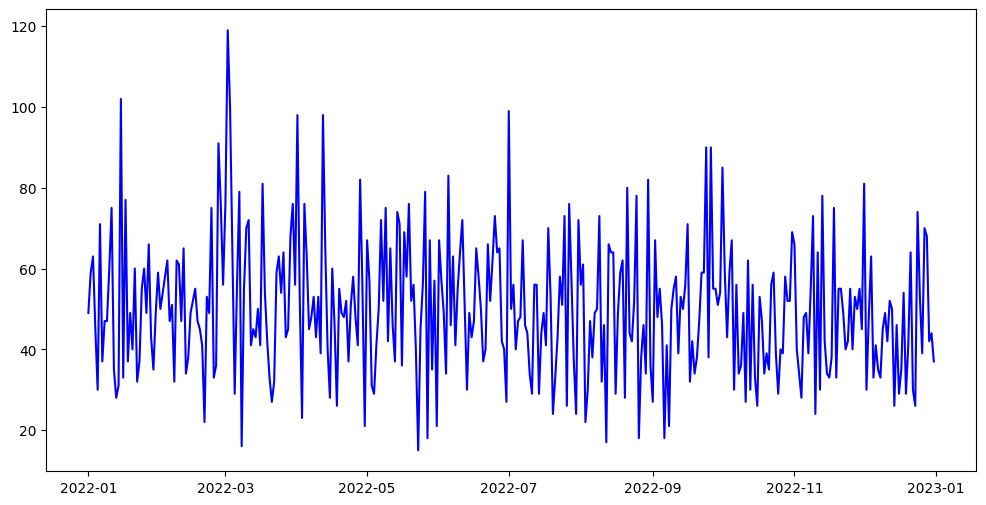

In [159]:
# Tampilkan hasil prediksi dalam satu plot bersama data asli
plt.figure(figsize=(12, 6))
plt.plot(df_regression.index, df_regression['Qty'], label='Actual Data', color='blue')
plt.plot(forecast.index, forecast['Qty'], label='Forecast', linestyle='dashed', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.show()

# **Clustering**

In [120]:
df_merged.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,Yoghurt,44,1,Married,14.58,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,Choco Bar,27,1,Single,0.18,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,Choco Bar,48,1,Married,12.57,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,Yoghurt,33,0,Married,6.95,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [121]:
df_clustering = df_merged.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

In [122]:
df_clustering.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [123]:
df_clustering

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


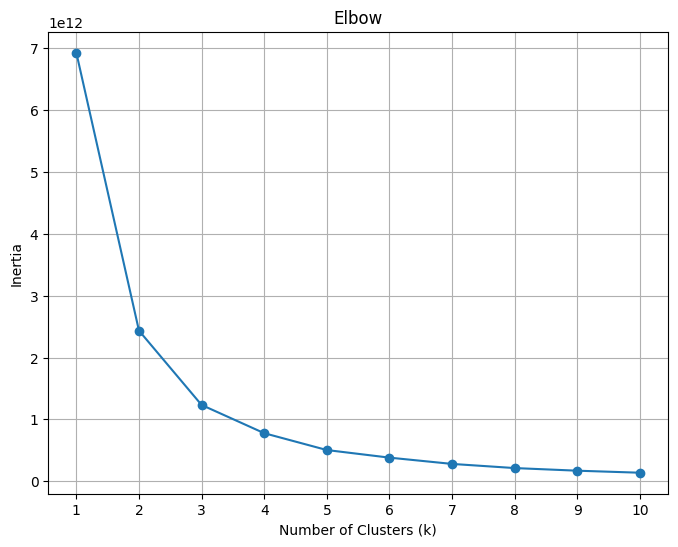

In [124]:
#elbow
from sklearn.cluster import KMeans
features = df_clustering[['TransactionID', 'Qty', 'TotalAmount']]

# Inertia for total cluster from 1 until 10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot inertia curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [125]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [126]:
df = pd.DataFrame(df_clustering)

In [127]:
# Features that will be used for clustering
features = df_clustering[['TransactionID', 'Qty', 'TotalAmount']]

In [128]:
# Determine the desired number of clusters
n_clusters = 4

In [129]:
# Create K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [130]:
# clustering
df['cluster'] = kmeans.fit_predict(features)

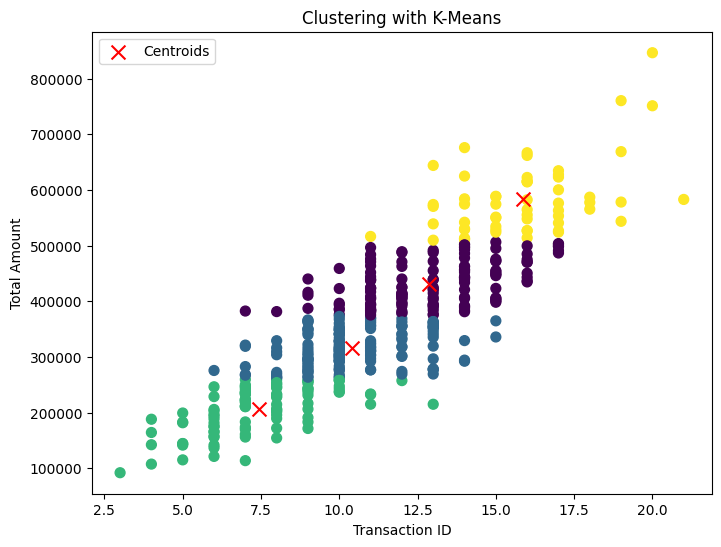

In [131]:
# Data visualization
plt.figure(figsize=(8, 6))
plt.scatter(df['TransactionID'], df['TotalAmount'], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Transaction ID')
plt.ylabel('Total Amount')
plt.title('Clustering with K-Means')
plt.legend()
plt.show()